In [45]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,20)
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# Testing a model

## Simulating the results of the model

In [2]:
def throw_a_coin(N):
    return np.random.choice(['H', 'T'], size=N)
throws=throw_a_coin(40)
print("Throws:", " ".join(throws))
print("Number of Heads:", np.sum(throws=='H'))
print("p1 = Number of Heads/Total Throws:", np.sum(throws=='H')/40.)

Throws: H H T T H H T T T T H H H T H T T T H H H H T T T H H H T T H T T T H T H H H T
Number of Heads: 20
p1 = Number of Heads/Total Throws: 0.5


In [3]:
throws=throw_a_coin(10000)
print("First 1000 Throws:", " ".join(throws)[:1000])
print("Number of Heads:", np.sum(throws=='H'))
print("p for 10,000 = Number of Heads/Total Throws:", np.sum(throws=='H')/10000)

First 1000 Throws: H T H T T T H T H T H H T H H H H T H T T T H H H H H T H H T H H T H H T T H H H T T H H T T H T T T T T T T H H H H H T T T H T H H H H H H T T T T T T T H H H H H T T H T H T H H T T T H T H H T H T T H H H T H H T T H H H T H T H T T H H H T T T T H H H T T H H H H H T T H T T H H H T H T T T T H T T H T T H H T H H H T T H T H T H T H H H H T T H H H T T H H H H H H H H H T T T T H T H T T H H T T H T T H H T H T H T H T T H T T T T H H T T H H H H T T T H T T H H T T T T H T H H H H H H T T H T T T T H T H H T H H T H T T H T H T H H H T H H T T T H H T T H T H H H H H H T T H H T T H T H H H T H H H H H H H H T H T H T H H T T T T T H T T H T T H H T H H H H T H T H H H T T T T H T H H T H T H T T T T T H H H H H H H H T T T H T H T H T T T H T T H T T T T T H H T H T H T T H H T H T T T T T T T T T T H T H T H T H T T T T T T T H T H H H H H H T T T T T H T H T T H T T T T T T T T H T T T T T H H T T T T H T T H T T T T H H T T T H H T H T H H H T T T H T T H

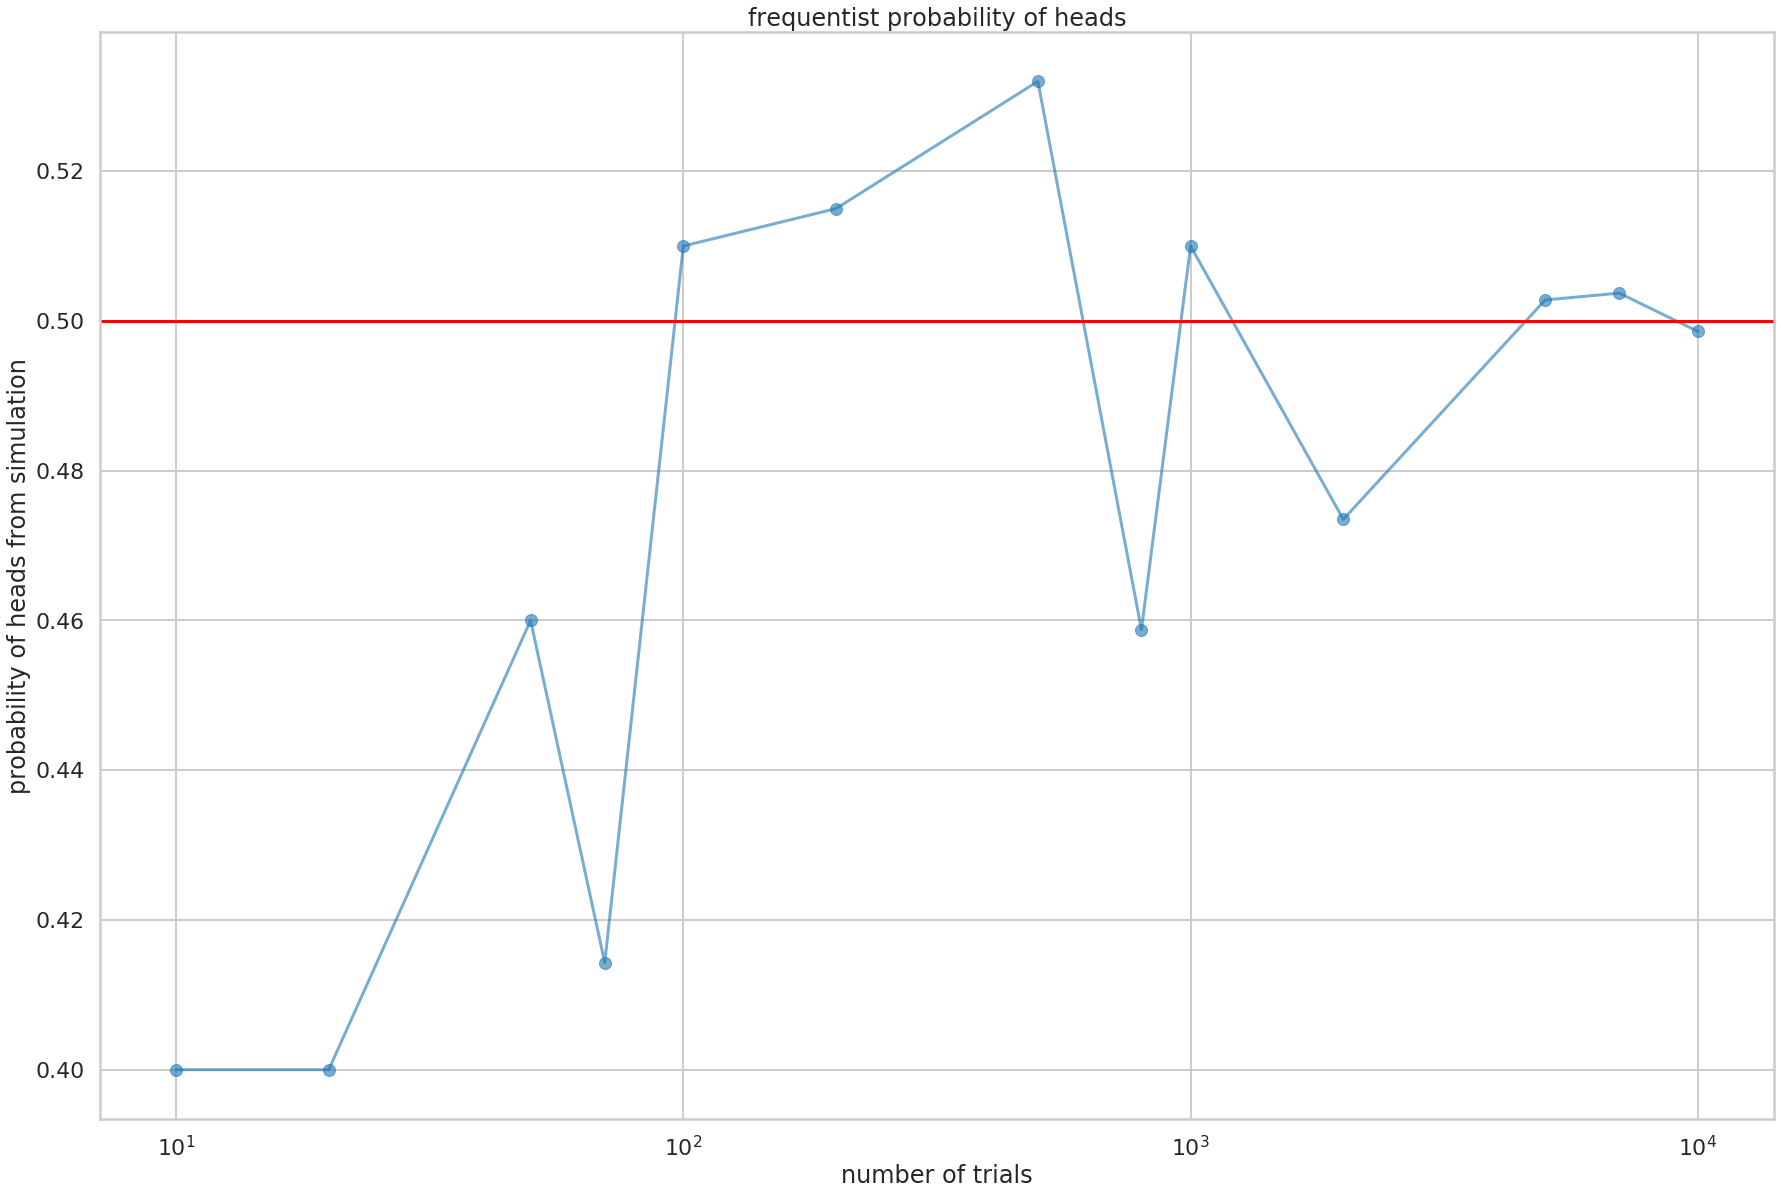

In [37]:
trials = [10, 20, 50, 70, 100, 200, 500, 800, 1000, 2000, 5000, 7000, 10000]
plt.plot(trials, [np.sum(throw_a_coin(j)=='H')/np.float(j) for j in trials], 'o-', alpha=0.6);
plt.xscale("log")
plt.axhline(0.5, 0, 1, color='r')
plt.xlabel('number of trials');
plt.ylabel('probability of heads from simulation');
plt.title('frequentist probability of heads');

# Presidential Election model

## Simulating

In [7]:
predictwise = pd.read_csv('predictwise.csv').set_index('States')
predictwise.head()

,Obama,Romney,Votes
States,,,
Alabama,0.000,1.000,9
Alaska,0.000,1.000,3
Arizona,0.062,0.938,11
Arkansas,0.000,1.000,6
California,1.000,0.000,55


In [8]:
predictwise.shape

(51, 3)

In [9]:
def simulate_election(model, n_sim):
    simulations = np.random.uniform(size=(51, n_sim))
    obama_votes = (simulations < model.Obama.values.reshape(-1, 1)) * model.Votes.values.reshape(-1, 1)
    return obama_votes.sum(axis=0)

In [10]:
result = simulate_election(predictwise, 10000)
print((result >= 269).sum())

9961


In [11]:
result

array([288, 328, 299, ..., 319, 305, 283])

In [13]:
predictwise.Obama.values.shape

(51,)

In [16]:
a = predictwise.Obama.values.reshape(-1, 1)
a

array([[0.   ],
       [0.   ],
       [0.062],
       [0.   ],
       [1.   ],
       [0.807],
       [1.   ],
       [1.   ],
       [1.   ],
       [0.72 ],
       [0.004],
       [1.   ],
       [0.   ],
       [1.   ],
       [0.036],
       [0.837],
       [0.   ],
       [0.   ],
       [0.   ],
       [1.   ],
       [1.   ],
       [1.   ],
       [0.987],
       [0.982],
       [0.   ],
       [0.074],
       [0.046],
       [0.   ],
       [0.851],
       [0.857],
       [0.998],
       [0.985],
       [1.   ],
       [0.349],
       [0.025],
       [0.89 ],
       [0.   ],
       [0.976],
       [0.978],
       [1.   ],
       [0.   ],
       [0.001],
       [0.001],
       [0.   ],
       [0.   ],
       [1.   ],
       [0.798],
       [0.999],
       [0.002],
       [0.925],
       [0.   ]])

In [17]:
a.shape

(51, 1)

In [19]:
b = predictwise.Votes.values.reshape(-1, 1)
b.shape

(51, 1)

In [22]:
(a * b)

array([[0.0000e+00],
       [0.0000e+00],
       [6.8200e-01],
       [0.0000e+00],
       [5.5000e+01],
       [7.2630e+00],
       [7.0000e+00],
       [3.0000e+00],
       [3.0000e+00],
       [2.0880e+01],
       [6.4000e-02],
       [4.0000e+00],
       [0.0000e+00],
       [2.0000e+01],
       [3.9600e-01],
       [5.0220e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [4.0000e+00],
       [1.0000e+01],
       [1.1000e+01],
       [1.5792e+01],
       [9.8200e+00],
       [0.0000e+00],
       [7.4000e-01],
       [1.3800e-01],
       [0.0000e+00],
       [5.1060e+00],
       [3.4280e+00],
       [1.3972e+01],
       [4.9250e+00],
       [2.9000e+01],
       [5.2350e+00],
       [7.5000e-02],
       [1.6020e+01],
       [0.0000e+00],
       [6.8320e+00],
       [1.9560e+01],
       [4.0000e+00],
       [0.0000e+00],
       [3.0000e-03],
       [1.1000e-02],
       [0.0000e+00],
       [0.0000e+00],
       [3.0000e+00],
       [1.0374e+01],
       [1.198

In [26]:
simulations = np.random.uniform(size=(51, 3))
simulations.shape

(51, 3)

In [27]:
simulations

array([[0.68603526, 0.38063805, 0.61507481],
       [0.97731262, 0.0544968 , 0.38056948],
       [0.47217825, 0.50264664, 0.69228416],
       [0.38459983, 0.54736278, 0.8303494 ],
       [0.86296946, 0.12962197, 0.98967458],
       [0.46286925, 0.19376441, 0.4889633 ],
       [0.9472146 , 0.34934766, 0.20547685],
       [0.35883176, 0.41495175, 0.59146372],
       [0.001946  , 0.92154856, 0.56715793],
       [0.07686566, 0.30163179, 0.76779137],
       [0.02984429, 0.05799691, 0.37231748],
       [0.66781387, 0.37443371, 0.92732058],
       [0.36154642, 0.35904635, 0.81225141],
       [0.1949927 , 0.32999223, 0.79243682],
       [0.47741442, 0.52946939, 0.32630761],
       [0.53092538, 0.80141721, 0.72782153],
       [0.72480396, 0.76625036, 0.52869185],
       [0.40512232, 0.9657147 , 0.93924106],
       [0.99032833, 0.63569923, 0.19980441],
       [0.77749995, 0.21721311, 0.46789637],
       [0.97391291, 0.42039038, 0.60697639],
       [0.74084552, 0.970896  , 0.59562061],
       [0.

In [29]:
(simulations < a)*b

array([[ 0,  0,  0],
       [ 0,  0,  0],
       [ 0,  0,  0],
       [ 0,  0,  0],
       [55, 55, 55],
       [ 9,  9,  9],
       [ 7,  7,  7],
       [ 3,  3,  3],
       [ 3,  3,  3],
       [29, 29,  0],
       [ 0,  0,  0],
       [ 4,  4,  4],
       [ 0,  0,  0],
       [20, 20, 20],
       [ 0,  0,  0],
       [ 6,  6,  6],
       [ 0,  0,  0],
       [ 0,  0,  0],
       [ 0,  0,  0],
       [ 4,  4,  4],
       [10, 10, 10],
       [11, 11, 11],
       [16, 16, 16],
       [10, 10, 10],
       [ 0,  0,  0],
       [ 0,  0,  0],
       [ 0,  0,  0],
       [ 0,  0,  0],
       [ 0,  6,  6],
       [ 4,  4,  4],
       [14, 14, 14],
       [ 5,  5,  5],
       [29, 29, 29],
       [ 0, 15,  0],
       [ 0,  0,  0],
       [18, 18, 18],
       [ 0,  0,  0],
       [ 7,  7,  7],
       [20, 20, 20],
       [ 4,  4,  4],
       [ 0,  0,  0],
       [ 0,  0,  0],
       [ 0,  0,  0],
       [ 0,  0,  0],
       [ 0,  0,  0],
       [ 3,  3,  3],
       [ 0, 13, 13],
       [12, 1

In [32]:
((simulations < a)*b).sum(axis=0)

array([313, 347, 293])

## Displaying

In [35]:
def plot_simulation(simulation):
    plt.hist(simulation, bins=np.arange(200, 538, 1),
             label='simulations', align='left', density=True)
    plt.axvline(332, 0, .5, color='r', label='Actual Outcome')
    plt.axvline(269, 0, .5, color='k', label='Victory Threshold')
    p05 = np.percentile(simulation, 5.)
    p95 = np.percentile(simulation, 95.)
    iq = int(p95 - p05)
    pwin = ((simulation >= 269).mean()*100)
    plt.title("Chance of Obama Victory: %0.2f%%, Spread: %d votes" % (pwin, iq))
    plt.legend(frameon=False, loc='upper left')
    plt.xlabel("Obama Electoral College Votes")
    plt.ylabel("Probability")
    sns.despine()

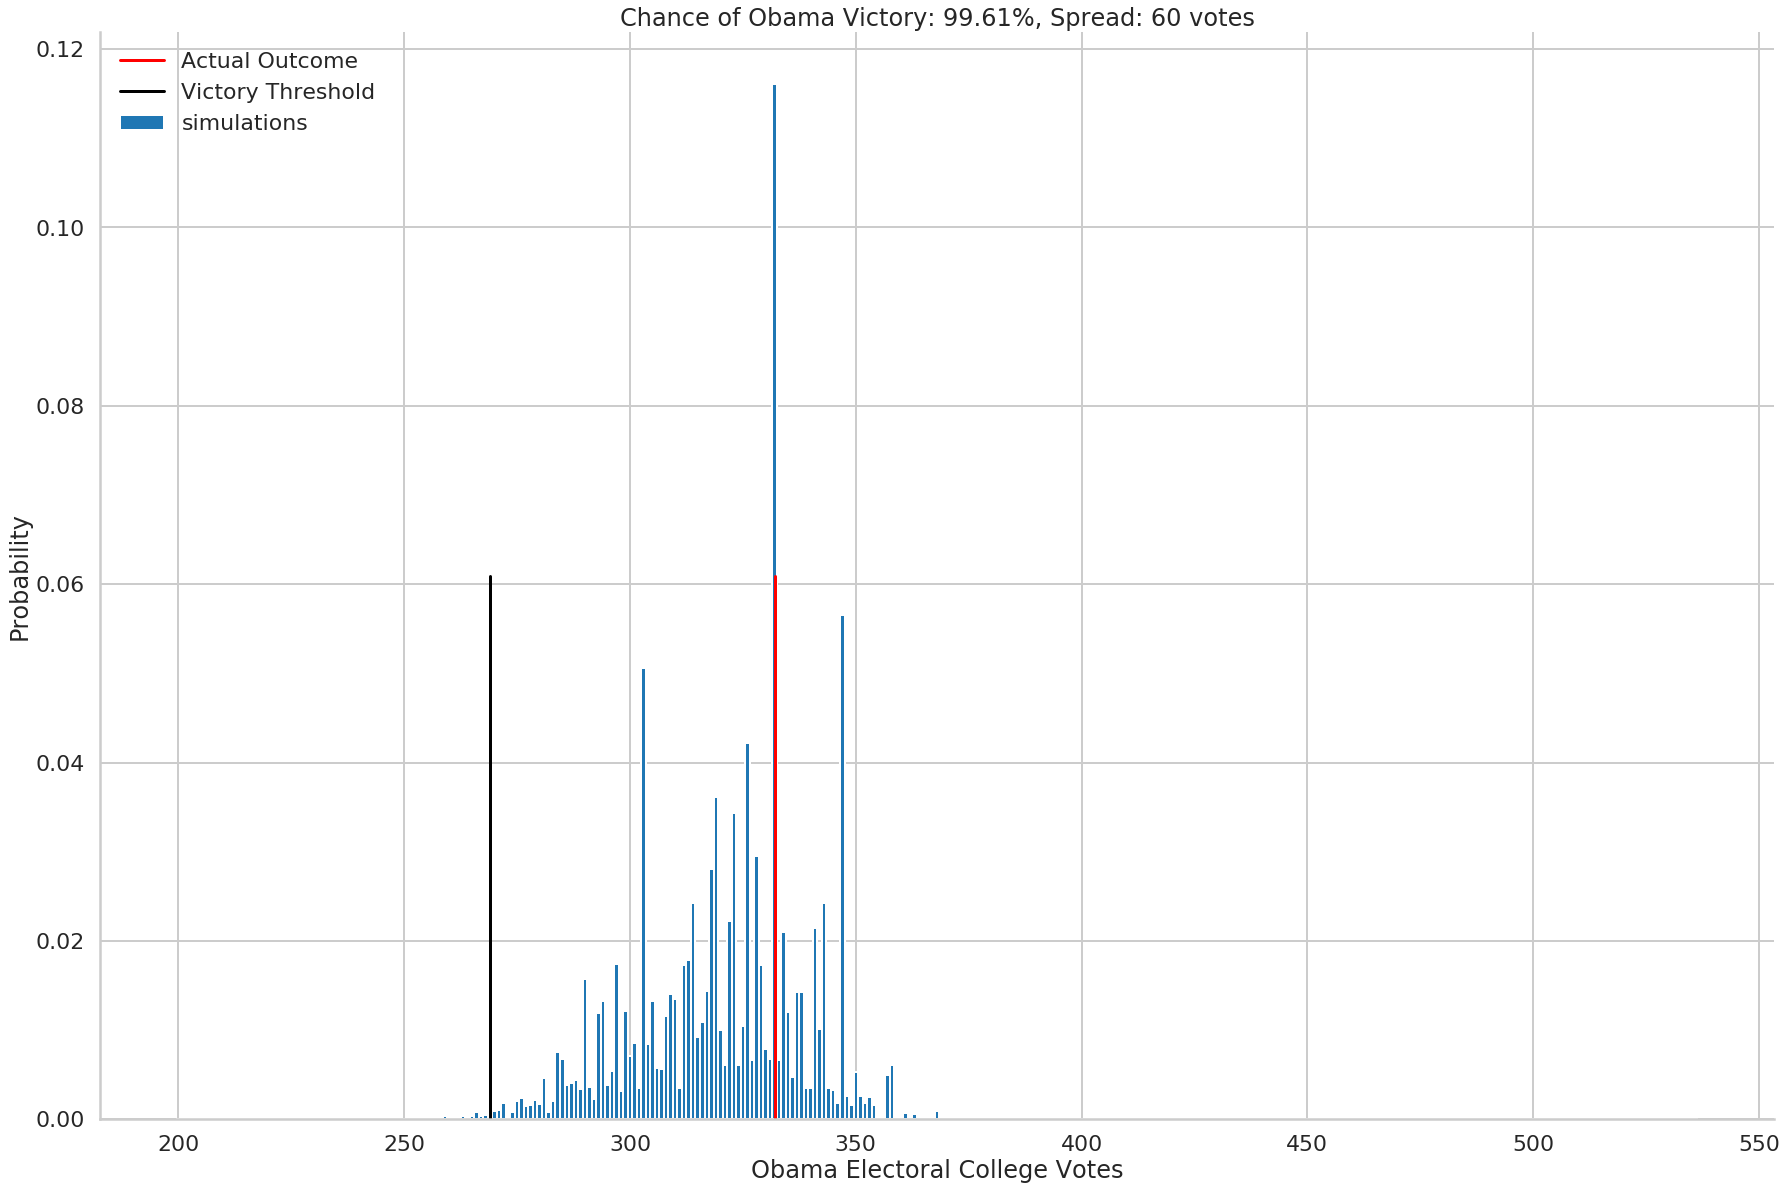

In [38]:
plot_simulation(result)

In [39]:
result

array([288, 328, 299, ..., 319, 305, 283])

In [40]:
result.shape

(10000,)

In [41]:
result >= 269

array([ True,  True,  True, ...,  True,  True,  True])

In [42]:
(result >= 269).mean()

0.9961

In [44]:
(result >= 269).sum()/len(result)

0.9961

# Bernoulli Random Variables

In [46]:
from scipy.stats import bernoulli
brv=bernoulli(p=0.3)
brv.rvs(size=20)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0])

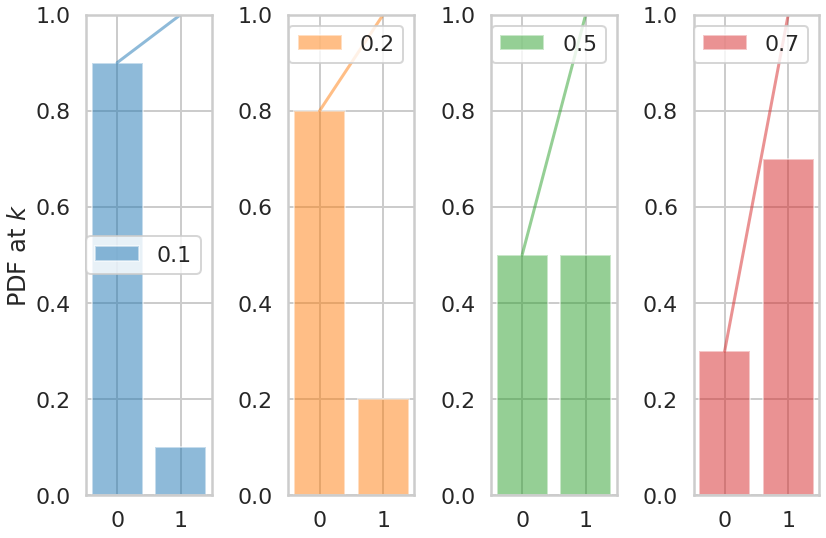

In [48]:
event_space=[0, 1]
plt.figure(figsize=(12, 8))
colors=sns.color_palette()
for i, p in enumerate([0.1, 0.2, 0.5, 0.7]):
    ax = plt.subplot(1, 4, i+1)
    plt.bar(event_space, bernoulli.pmf(event_space, p), label=p, color=colors[i], alpha=0.5)
    plt.plot(event_space, bernoulli.cdf(event_space, p), color=colors[i], alpha=0.5)
    
    ax.xaxis.set_ticks(event_space)
    
    plt.ylim((0, 1))
    plt.legend(loc=0)
    if i == 0:
        plt.ylabel("PDF at $k$")
plt.tight_layout()

# Empirical Distribution

In [49]:
CDF = lambda x: np.float(np.sum(result < x)) / result.shape[0]
for votes in [200, 300, 320, 340, 360, 400, 500]:
    print("Obama Win PDF at votes=", votes, " is ", CDF(votes))

Obama Win PDF at votes= 200  is  0.0
Obama Win PDF at votes= 300  is  0.1472
Obama Win PDF at votes= 320  is  0.4509
Obama Win PDF at votes= 340  is  0.843
Obama Win PDF at votes= 360  is  0.997
Obama Win PDF at votes= 400  is  1.0
Obama Win PDF at votes= 500  is  1.0


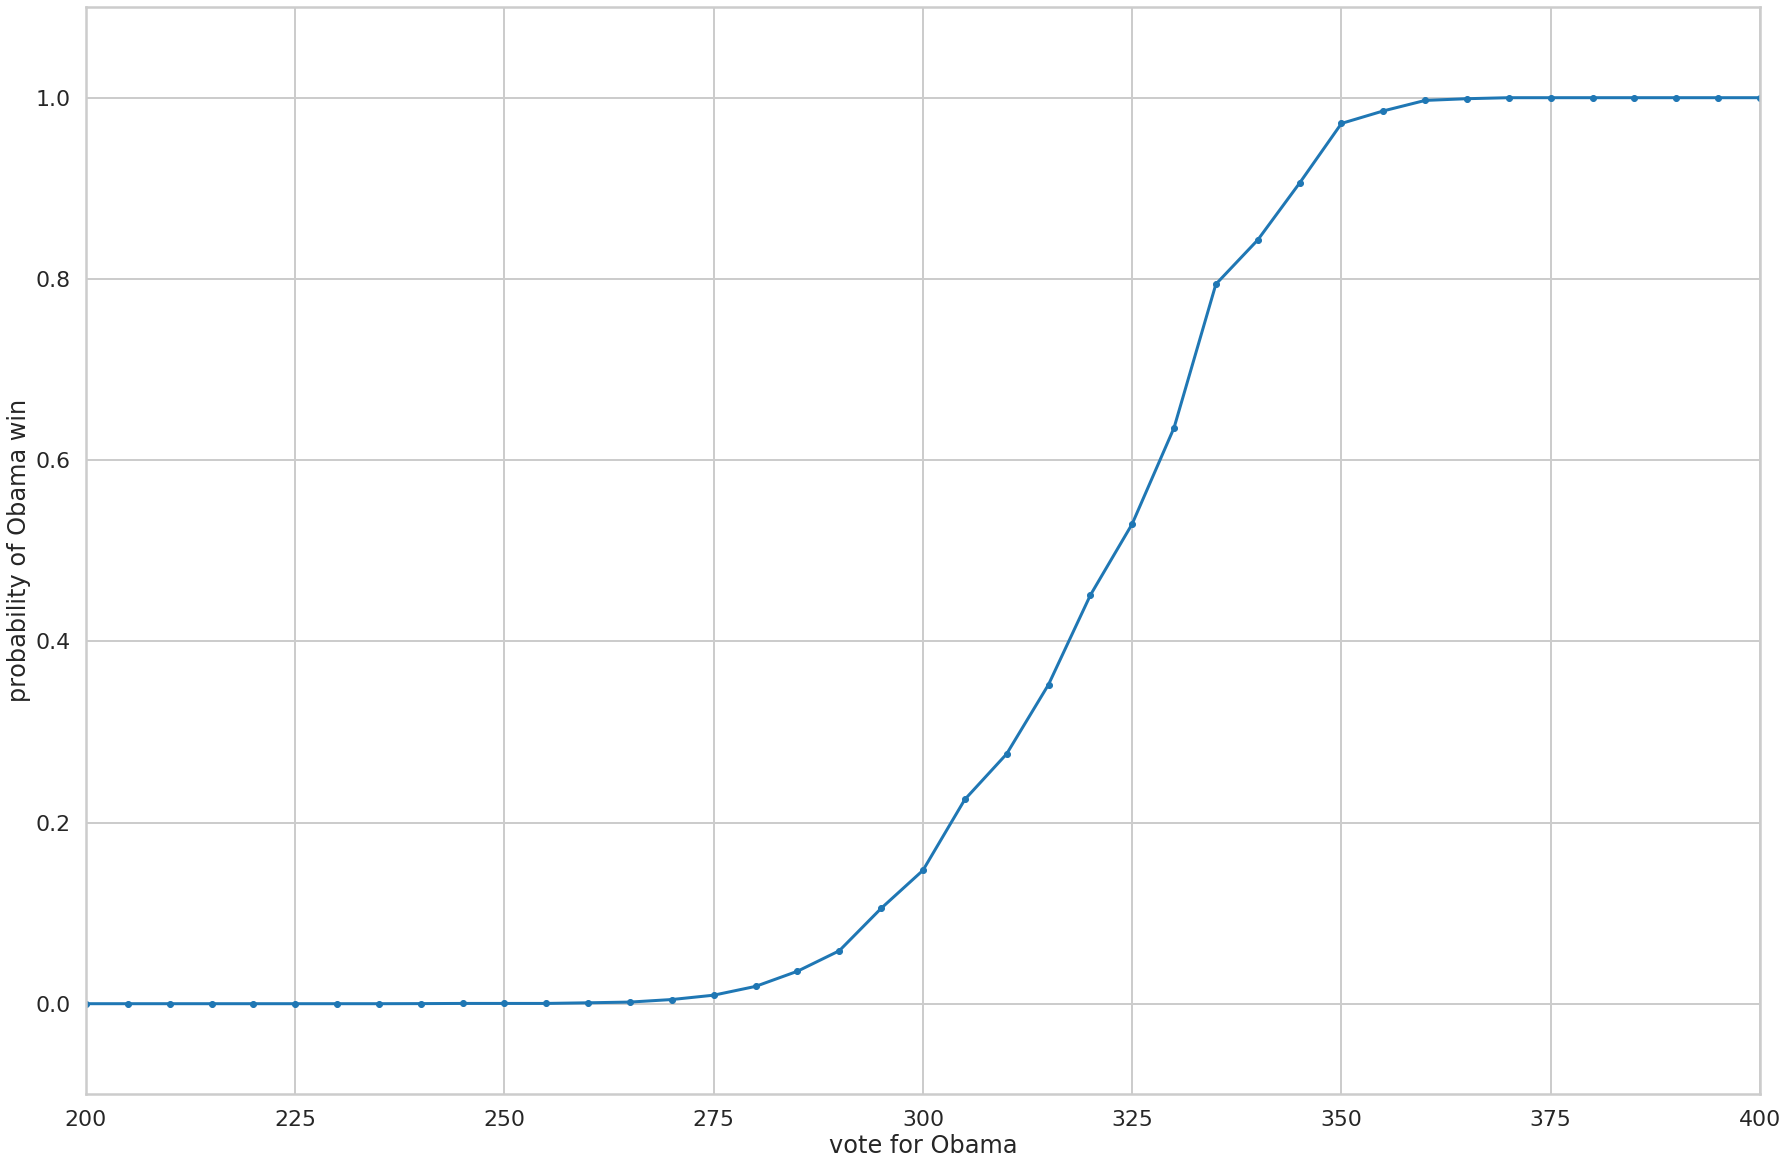

In [51]:
votelist=np.arange(0, 540, 5)
plt.plot(votelist, [CDF(v) for v in votelist], '.-')
plt.xlim([200, 400])
plt.ylim([-0.1, 1.1])
plt.xlabel("vote for Obama")
plt.ylabel("probability of Obama win");

# Binomial Distribution

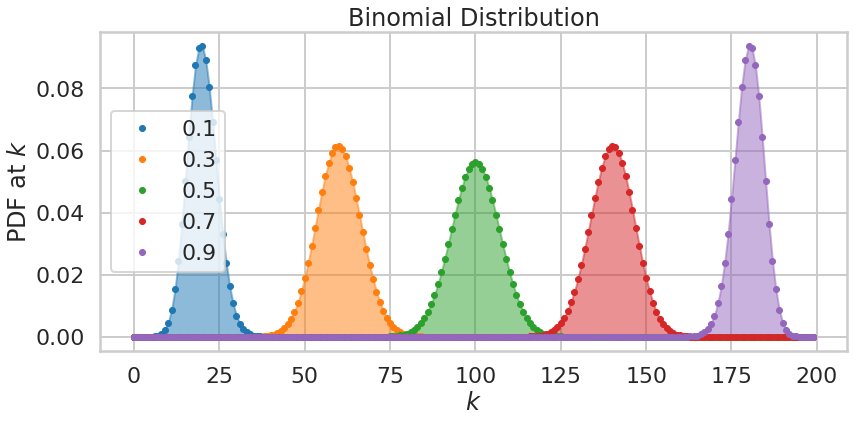

In [53]:
from scipy.stats import binom
plt.figure(figsize=(12, 6))
k = np.arange(0, 200)
for p, color in zip([0.1, 0.3, 0.5, 0.7, 0.9], colors):
    rv = binom(200, p)
    plt.plot(k, rv.pmf(k), '.', lw=2, color=color, label=p)
    plt.fill_between(k, rv.pmf(k), color=color, alpha=0.5)
q=plt.legend()
plt.title("Binomial Distribution")
plt.tight_layout()
q=plt.ylabel("PDF at $k$")
q=plt.xlabel("$k$")